In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
data = pd.read_csv(r"../DataCleaning/cleaned_data.csv")

In [97]:
data.head()

,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,...,Price_lag30,Market_Trend_Index_lag1,Market_Trend_Index_lag7,Market_Trend_Index_lag30,Competitor_Activity_Score_lag1,Competitor_Activity_Score_lag7,Competitor_Activity_Score_lag30,Consumer_Confidence_Index_lag1,Consumer_Confidence_Index_lag7,Consumer_Confidence_Index_lag30
0,1001,Tablet,165.48,2010-07-07,Summer,1.657146,0.019664,59.221951,Spec_C,High-Resolution,...,164.15,0.579628,0.612768,0.402433,-1.177569,0.450107,1.649988,78.025271,50.134993,78.520788
1,1001,Smartphone,165.48,2010-09-01,Fall,0.392767,0.907459,63.516774,Spec_B,Long-Battery-Life,...,164.15,1.657146,0.414119,-0.873212,0.019664,-0.077862,0.108857,59.221951,59.827583,79.837034
2,1001,Tablet,165.48,2010-09-17,Fall,-0.580265,1.244480,76.868524,Spec_A,High-Resolution,...,165.48,0.392767,-0.559705,-0.214781,0.907459,1.319749,1.303043,63.516774,74.301478,83.112046
3,1001,Tablet,165.48,2010-09-17,Fall,1.079543,0.383044,57.406367,Spec_C,High-Resolution,...,165.48,-0.580265,1.657146,-0.765523,1.244480,1.649988,0.986474,76.868524,61.487401,63.134754
4,1001,Tablet,165.48,2010-09-28,Fall,-0.023678,0.226171,79.329676,Spec_B,High-Resolution,...,165.48,1.079543,-1.088462,1.357634,0.383044,1.601871,-0.883930,57.406367,92.756192,47.261511


### Exploratory Data Analysis

In [98]:
def EDA_Stage_1(data, name):
  print("="*100)
  print(f"{name} dataset information")
  print(data.info())
  print("="*100)
  print(f"{name} dataset description")
  print(data.describe())
  print("="*100)
  print(f"{name} dataset shape")
  print(data.shape)
  print("="*100)
  print(f"{name} dataset columns")
  print(data.columns)
  print("="*100)
  print(f"{name} dataset null values")
  print(data.isna().sum())
  print("="*100)
  print(f"{name} dataset duplicate values")
  print(data.duplicated().sum())
  print("="*100)

In [99]:
EDA_Stage_1(data, "Electronics Forecasting Data")

Electronics Forecasting Data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115373 entries, 0 to 115372
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Product_ID                       115373 non-null  int64  
 1   Category                         115373 non-null  object 
 2   Price                            115373 non-null  float64
 3   Date                             115373 non-null  object 
 4   Season                           115373 non-null  object 
 5   Market_Trend_Index               115373 non-null  float64
 6   Competitor_Activity_Score        115373 non-null  float64
 7   Consumer_Confidence_Index        115373 non-null  float64
 8   Product_Specification_1          115373 non-null  object 
 9   Product_Specification_2          115373 non-null  object 
 10  Sales_Volume                     115373 non-null  int64  
 11  Total_Amount    

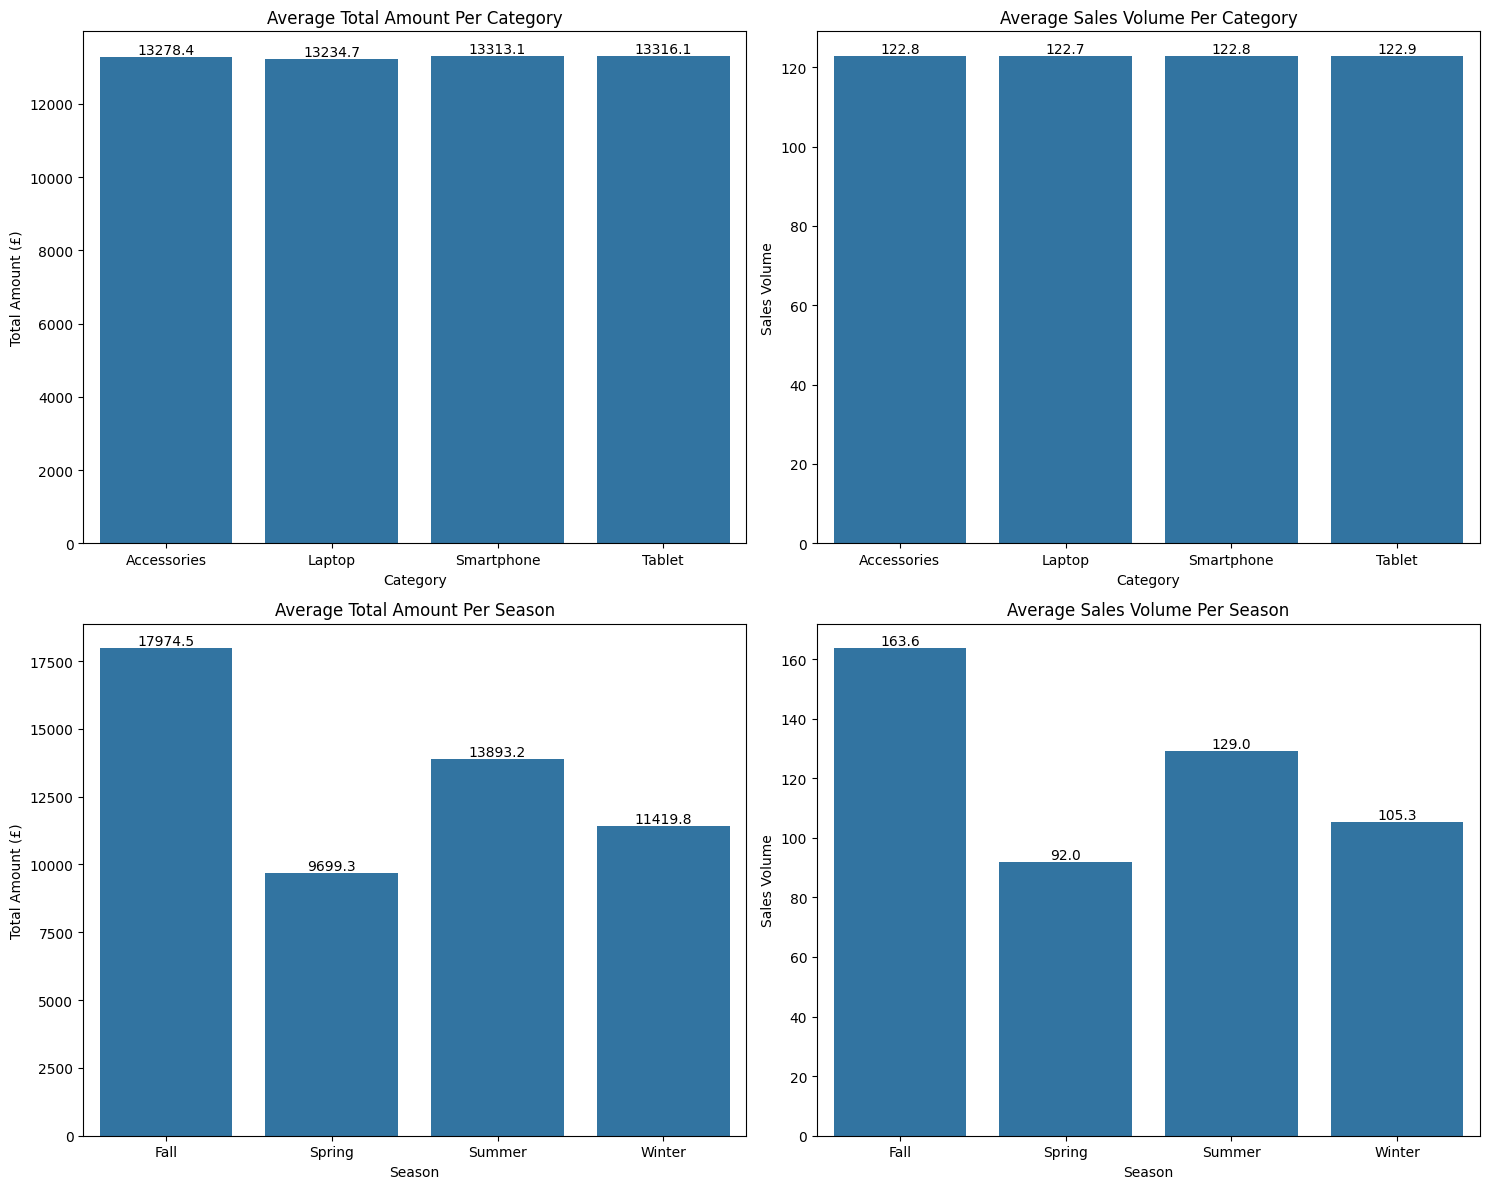

In [100]:

def annotate_bars(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
average_total_amount_per_category = data.groupby('Category')['Total_Amount'].mean()
ax1 = sns.barplot(x=average_total_amount_per_category.index, y=average_total_amount_per_category.values)
annotate_bars(ax1, average_total_amount_per_category.values)
plt.title("Average Total Amount Per Category")
plt.xlabel("Category")
plt.ylabel("Total Amount (£)")

plt.subplot(2,2,2)
average_sales_volume_per_category = data.groupby('Category')['Sales_Volume'].mean()
ax2 = sns.barplot(x=average_sales_volume_per_category.index, y=average_sales_volume_per_category.values)
annotate_bars(ax2, average_sales_volume_per_category.values)
plt.title("Average Sales Volume Per Category")
plt.xlabel("Category")
plt.ylabel("Sales Volume")

plt.subplot(2,2,3)
average_total_amount_per_season = data.groupby('Season')['Total_Amount'].mean()
ax3 = sns.barplot(x=average_total_amount_per_season.index, y=average_total_amount_per_season.values)
annotate_bars(ax3, average_total_amount_per_season.values)
plt.title("Average Total Amount Per Season")
plt.xlabel("Season")
plt.ylabel("Total Amount (£)")

plt.subplot(2,2,4)
average_sales_volume_per_season = data.groupby('Season')['Sales_Volume'].mean()
ax4 = sns.barplot(x=average_sales_volume_per_season.index, y=average_sales_volume_per_season.values)
annotate_bars(ax4, average_sales_volume_per_season.values)
plt.title("Average Sales Volume Per Season")
plt.xlabel("Season")
plt.ylabel("Sales Volume")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

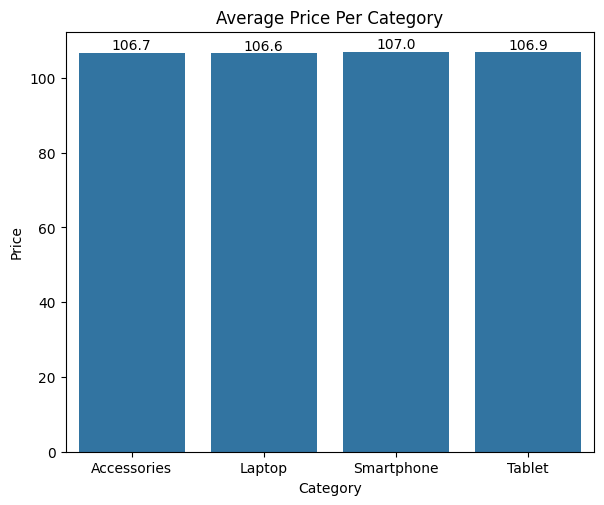

In [101]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
average_price_per_category = data.groupby('Category')['Price'].mean()
ax5 = sns.barplot(x=average_price_per_category.index, y=average_price_per_category.values)
annotate_bars(ax5, average_price_per_category.values)
plt.title("Average Price Per Category")
plt.xlabel("Category")
plt.ylabel("Price")

### Sales Volume Distribution

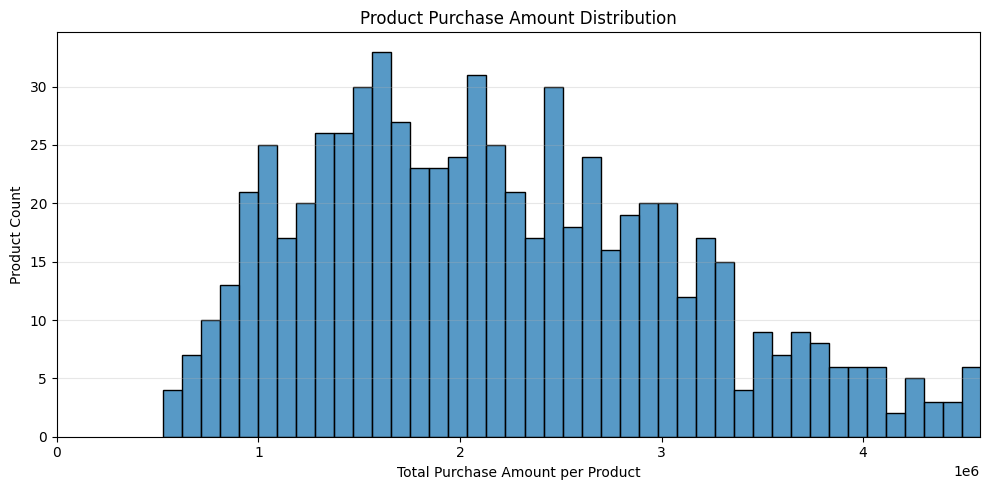

In [81]:
# Aggregate Total Amount per Product
product_sales = data.groupby("Product_ID")["Total_Amount"].sum()

plt.figure(figsize=(10, 5))

sns.histplot(product_sales, bins=50)

plt.title("Product Purchase Amount Distribution")
plt.xlabel("Total Purchase Amount per Product")
plt.ylabel("Product Count")

upper_limit = product_sales.quantile(0.99)
plt.xlim(0, upper_limit)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

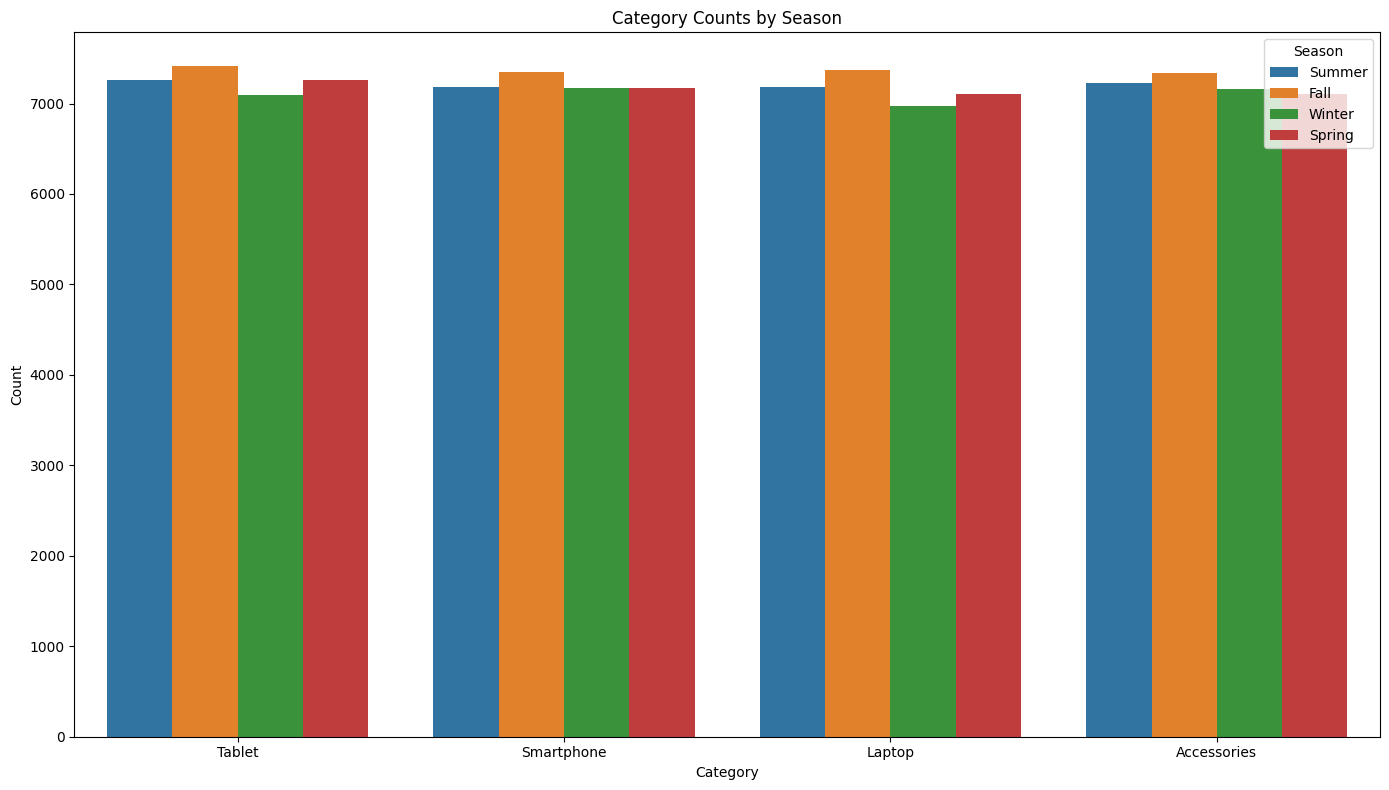

In [82]:
plt.figure(figsize=(14, 8))
sns.countplot(
    data=data,
    x='Category',
    hue='Season'
)
plt.title("Category Counts by Season")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Season")
plt.tight_layout()
plt.show()


### Visualise Monthly Trend

In [105]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
print(f"Start date: {data['Date'].min().date()}")
print(f"End date:   {data['Date'].max().date()}")

Start date: 2010-02-10
End date:   2020-12-30


### Plot the time series

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_13524\662028409.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales_Volume']


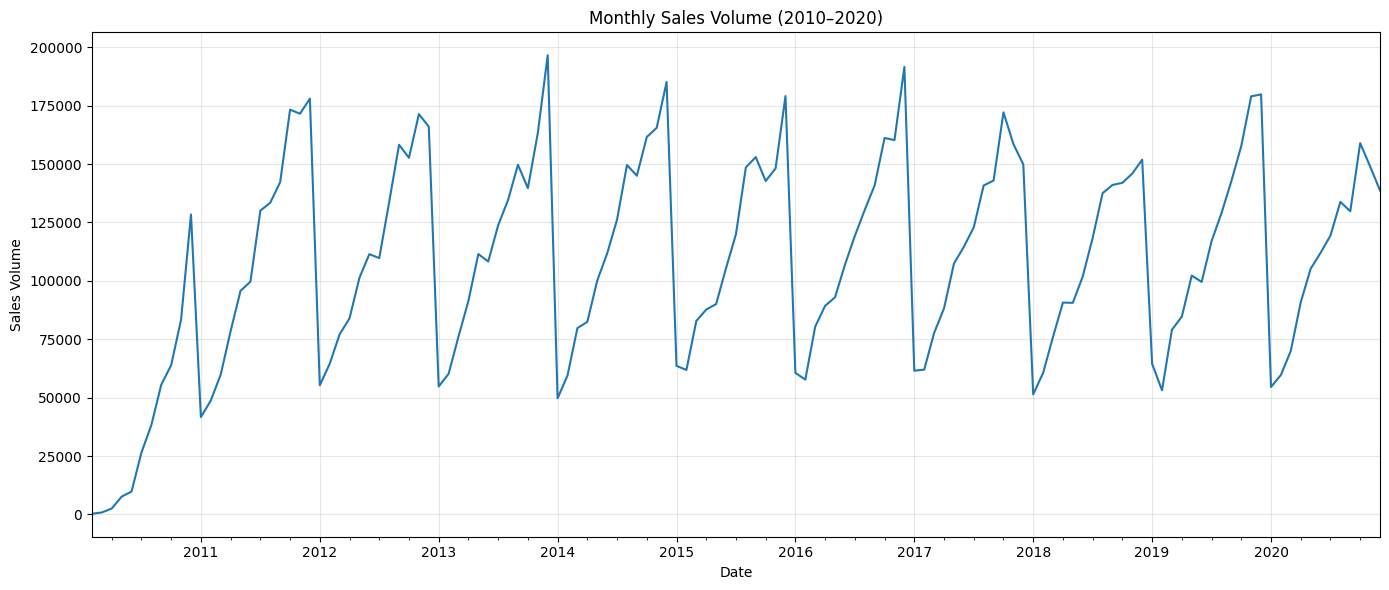

In [106]:
# Aggregate to monthly
ts = (
    data
    .set_index('Date')
    .resample('M')['Sales_Volume']
    .sum()
)

plt.figure(figsize=(14, 6))
ts.plot()
plt.title('Monthly Sales Volume (2010–2020)')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



I can see yearly oscillations, which suggest the likely presence of seasonality, but there is no clear upward or downward trend.

### Decomposition

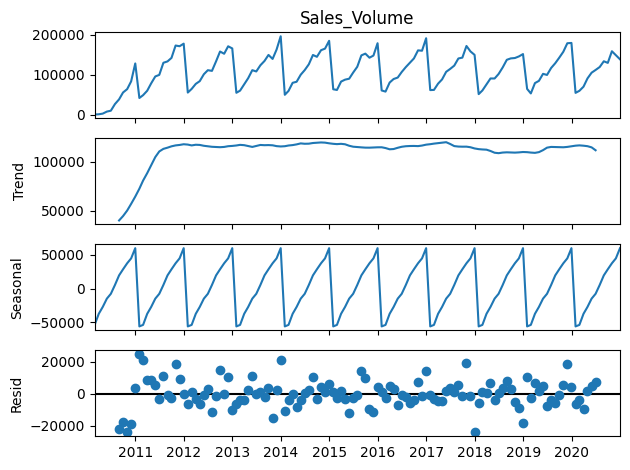

In [109]:
result = seasonal_decompose(ts, model='additive', period=12)  # period=12 for monthly seasonality
result.plot()
plt.tight_layout()
plt.show()


According to the decomposition, the seasonal component captures repeating patterns at yearly intervals. There is a clear regular pattern with values oscillating between 50k and -50k. The repeatinhg patterns indicate that seasonality is present, with predictable increases and decreases in sales volume at specific times of the year. The trend component rises in the first year, then plateaus and is relatively stable with no significant long term increase or decrease in sales volume over time.

### Hypothesis Testing (Prove Trending/Seasonality)

I used parametric regression to test for statistical trending and seasonality of the data

### Linear Regression Summary

In [112]:
import statsmodels.api as sm

# Create time variable
time = np.arange(len(ts))

# Fit linear regression
X = sm.add_constant(time)  # adds intercept
model = sm.OLS(ts.values, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     11.29
Date:                Sat, 13 Dec 2025   Prob (F-statistic):            0.00103
Time:                        23:29:25   Log-Likelihood:                -1583.3
No. Observations:                 131   AIC:                             3171.
Df Residuals:                     129   BIC:                             3176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.635e+04   7516.523     11.488      0.0

The linear regression model uses time as the predictor for Sales Volume.

Intercept: 86,350 (const)
 - Suggests the baseline Sales Volume at the start.

Slope: 335.8356 suggests (x1).
 - Suggests that for each unit increase in time, Sales Volume increases by 336 units. 
 - The positive slope is statistically significant (p = 0.001), so there is evidence of a positive trend.

R-squared: 0.080
 - Only 8% of the variance in Sales Volume is explained by time alone.
 - This means that other factors other than the linear trend capture most of the variation, such as seasonality.

Key Insight: Simple linear trend does not capture Sales Volume changes well.

### Sales Volume Trends between 2010 - 2020

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     78.49
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           8.16e-19
Time:                        00:02:29   Log-Likelihood:            -6.1781e+05
No. Observations:              115373   AIC:                         1.236e+06
Df Residuals:                  115371   BIC:                         1.236e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.5167      0.302    399.657      0.0

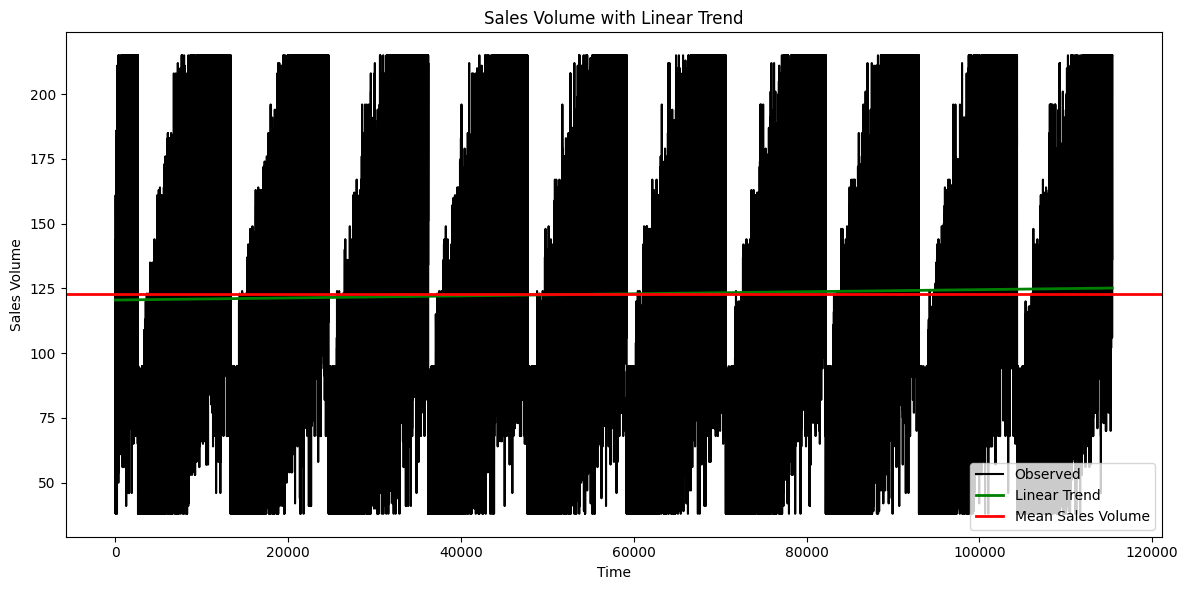

In [115]:
# --- 1. Prepare the time vector ---
data = data.sort_values('Date')  # ensure chronological order
ts = data['Sales_Volume'].reset_index(drop=True)

time = np.arange(1, len(ts)+1)  # 1, 2, ..., n
time_scaled = (time - time.min()) / (time.max() - 1)  # scale to 0-1

# --- 2. Fit linear regression ---
X = sm.add_constant(time_scaled)  # add intercept
model = sm.OLS(ts.values, X).fit()
print(model.summary())

# --- 3. Create DataFrame with fitted values ---
df_plot = pd.DataFrame({
    'Time': time,
    'Sales_Volume': ts,
    'Linear_Fitted': model.fittedvalues
})

# --- 4. Plot ---
plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='Time', y='Sales_Volume', color='black', label='Observed')
sns.lineplot(data=df_plot, x='Time', y='Linear_Fitted', color='green', linewidth=2, label='Linear Trend')
plt.axhline(y=ts.mean(), color='red', linewidth=2, label='Mean Sales Volume')
plt.xlabel('Time')
plt.ylabel('Sales Volume')
plt.title('Sales Volume with Linear Trend')
plt.legend()
plt.tight_layout()
plt.show()

Stationary Behaviour: Sales volume fluctuates consistently between 0 and >200, showing high variability. No strong upward or downward trend is visible over the period.

Mean Sales Volume: The horizontal red line indicates the stable average sales volume. The green line represents the linear trend, which is slightly increasing but insignificant.

Short-Term Variability: High-frequency oscillations are evident, driven by seasonal patterns.

Long-Term Trend: The linear trend is weakly increasing, meaning there are no major shifts in overall sales volume levels.

Conclusion: The sales volume data shows consistent seasonal fluctuations with a weak upward trend, suggesting long-term stability over the 170 years.

### Seasonal Sales Volume Variation

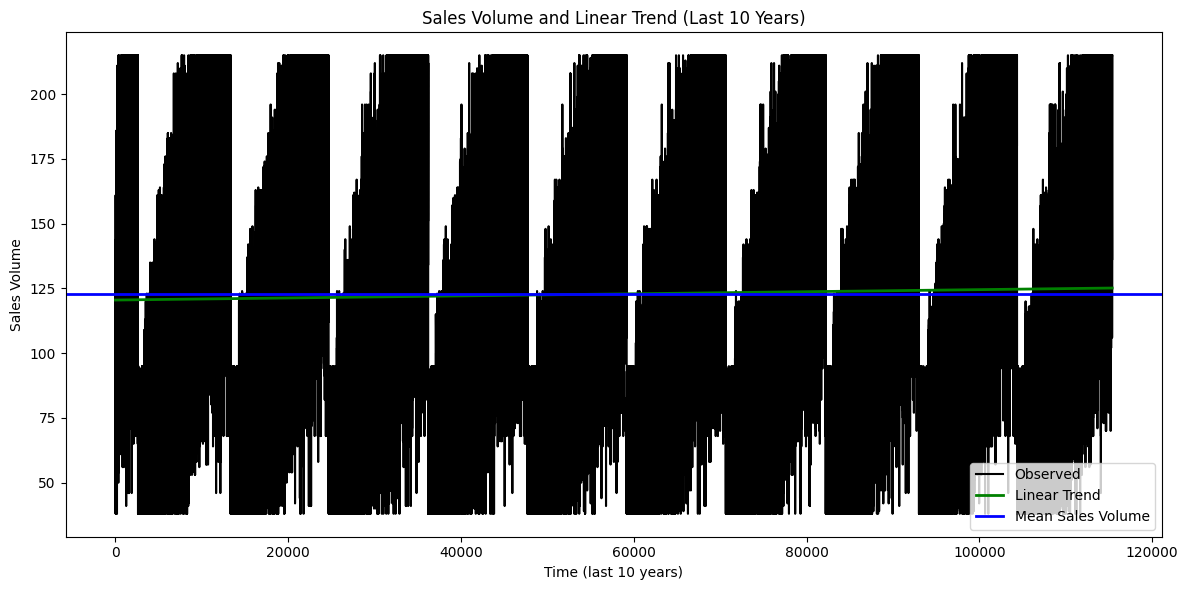

In [118]:
# --- Create time vector and fit linear trend ---
ts = data['Sales_Volume'].reset_index(drop=True)
time = np.arange(len(ts))  # 0,1,...,n-1
X = sm.add_constant(time)
linear_model = sm.OLS(ts.values, X).fit()

# --- Select last 10 years ---
last10 = data[data['Date'] >= '2010-02-10'].copy()  
last10.reset_index(drop=True, inplace=True)

# Time vector for last 10 years
time_last10 = np.arange(len(last10))
linear_fitted_last10 = linear_model.fittedvalues[-len(last10):]  # last 10 years

# --- Prepare DataFrame for plotting ---
df_plot = pd.DataFrame({
    'Time': time_last10,
    'Sales_Volume': last10['Sales_Volume'],
    'Linear_Fitted': linear_fitted_last10
})

# --- 5. Plot ---
plt.figure(figsize=(12,6))
sns.lineplot(data=df_plot, x='Time', y='Sales_Volume', color='black', label='Observed')
sns.lineplot(data=df_plot, x='Time', y='Linear_Fitted', color='green', linewidth=2, label='Linear Trend')
plt.axhline(y=last10['Sales_Volume'].mean(), color='blue', linewidth=2, label='Mean Sales Volume')
plt.xlabel('Time (last 10 years)')
plt.ylabel('Sales Volume')
plt.title('Sales Volume and Linear Trend (Last 10 Years)')
plt.legend()
plt.tight_layout()
plt.show()


Seasonal Pattern: The black line shows a consistent cyclical pattern, with regular peaks and troughs representing seasonal changes. Sales Volume rises and falls repetitively over the 10 years.

Mean Sales Volume: The horizontal blue line represents the long-term average Sales Volume. The green line indicates a stable trend, confirming no significant long-term change in mean Sales Volume.

Stationarity: The data demonstrates stationarity, with constant mean and variance over time.

Conclusion: The plot highlights strong seasonal cycles in Sales Volume data with no upward or downward trends.

### Cubic Polynomial Regression Results

In [121]:
# --- Prepare the data ---
data = data.sort_values('Date').reset_index(drop=True)
ts = data['Sales_Volume'].reset_index(drop=True)
time = np.arange(1, len(ts)+1)  # 1,2,...,n

# --- Polynomial features ---
time2 = time**2
time3 = time**3

# --- Linear regression ---
X_linear = sm.add_constant(time)
linear_model = sm.OLS(ts.values, X_linear).fit()
print("Linear model summary:")
print(linear_model.summary())

# Equivalent using 'poly' (raw=True) is same as above for degree 1

# --- Quadratic regression ---
X_quad = sm.add_constant(np.column_stack((time, time2)))
quad_model = sm.OLS(ts.values, X_quad).fit()
print("\nQuadratic model summary:")
print(quad_model.summary())


# --- Cubic regression ---
X_cubic = sm.add_constant(np.column_stack((time, time2, time3)))
cubic_model = sm.OLS(ts.values, X_cubic).fit()
print("\nCubic model summary:")
print(cubic_model.summary())


Linear model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     78.49
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           8.17e-19
Time:                        00:16:00   Log-Likelihood:            -6.1781e+05
No. Observations:              115373   AIC:                         1.236e+06
Df Residuals:                  115371   BIC:                         1.236e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.5167      0.3

Model Description: A cubic regression model was fitted with time, time², and time³ as predictors for Sales Volume.

Coefficients: The intercept (5.35e-07) is significant, representing the baseline Sales Volume. The coefficients for time, time², and time³ are significant (p-values < 0.05), suggesting these predictors contribute meaningfully to the model.

Model Fit: R-squared (-0.331): Which is negative due to poor fit relative to a horizontal mean model, showing that the cubic model explains essentially none of the variability in Sales_Volume

Residuals: The residuals have considerable variation that is unexplained by the model.
The large condition number (2.32e+15) suggests numerical instability and potential multicollinearity among polynomial terms.

Conclusion: The cubic regression model is statistically significant, but it fails to explain meaningful variance in Sales_Volume. This indicates that Sales_Volume is likely driven by seasonality, external factors, or random fluctuations, rather than a simple polynomial trend over time.

In [122]:
# Linear coefficients
print("Linear model coefficients:")
print(linear_model.params)

# Quadratic coefficients
print("\nQuadratic model coefficients:")
print(quad_model.params)

# Cubic coefficients
print("\nCubic model coefficients:")
print(cubic_model.params)

Linear model coefficients:
[1.20516662e+02 4.01065729e-05]

Quadratic model coefficients:
[ 1.26216582e+02 -2.56313979e-04  2.56921448e-09]

Cubic model coefficients:
[ 5.34961435e-07  8.22940497e-03 -1.47776851e-07  7.71879822e-13]


**Linear Model Coefficients:**

- Intercept: 120.5167
- Time: 0.00004011

The linear model suggests a very small positive increase in Sales_Volume over time. Although the slope is statistically significant (p < 0.001), the effect is minimal and the model explains almost none of the variation, indicating limited predictive power.

**Quadratic Model Coefficients:**
- Intercept: 126.2166
- Time: -0.0002563
- Time²: 2.569e-09

Adding a quadratic term introduces slight curvature, but the coefficients remain extremely small. The R-squared barely improves, showing that the quadratic model does not meaningfully capture additional variation in Sales_Volume.

**Cubic Model Coefficients:**
- Intercept: 5.35e-07
- Time: 0.008229
- Time²: -1.478e-07
- Time³: 7.719e-13

The cubic model adds flexibility, but the higher-order coefficients are extremely small. While statistically significant, their practical impact is negligible, and the model’s R-squared is negative (-0.331), reflecting poor fit and instability.

**Conclusion:**
- Higher-order polynomial models (quadratic and cubic) do not improve the fit or provide meaningful predictors for Sales_Volume. The very small coefficients indicate that polynomial terms are ineffective at capturing the patterns in the data, which are likely dominated by seasonality or random fluctuations rather than long-term polynomial trends.

**Linear Regression Results:**
- The slope (0.00004011) is positive but tiny and explains an insignificant fraction of the variance.
- R-squared = 0.001 → the linear trend captures essentially none of the variation in Sales_Volume.

**Polynomial Regression Results:**
- Adding quadratic and cubic terms does not meaningfully improve the model.
- All higher-order coefficients are statistically significant due to large sample size, but the R-squared values remain extremely low (0.001–0.003), showing no substantial trend.

**Seasonality Dominates:**
- The data shows periodic rises and falls in Sales_Volume, evident in plots.
- The lack of a strong linear or polynomial trend supports the idea that Sales_Volume fluctuations are mostly seasonal or random, rather than following a long-term upward or downward trajectory.

**Statistical Evidence:**
- Visual inspections (time series plots) and regression analyses (linear and polynomial) do not provide strong evidence for a meaningful trend in Sales_Volume over the 2010–2020 period.

## Conclusion

I do not find a significant increasing trend in this dataset based on the analyses. The data is dominated by seasonal fluctiations rather than clean long term trend. I can now proceed with model fitting.